In [1]:
# Hide all warnings
import warnings
warnings.simplefilter('ignore')

# Data
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots directly within Jupyter Out
%matplotlib inline

Let's start some example and construct toy dataset explicitly

In [2]:
received = [161, 181, 251, 151, 171, 160, 140, 202, 160, 139, 149, 177]
processed = [160, 180, 250, 150, 170, 150, 135, 156, 126, 104, 124, 140]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df = pd.DataFrame({'Received': received,
                   'Processed': processed,
                   '2019': months})
df

,Received,Processed,2019
0,161,160,Jan
1,181,180,Feb
2,251,250,Mar
3,151,150,Apr
4,171,170,May
5,160,150,Jun
6,140,135,Jul
7,202,156,Aug
8,160,126,Sep
9,139,104,Oct


Matplotlib provides a state-machine

import matplotlib.pyplot as plt
corresponding to a plot. The plot is refered to the last axes created explicitly by plt.subplots() or implicitly during calling plot methods like plt.plot()

# Matplotlib

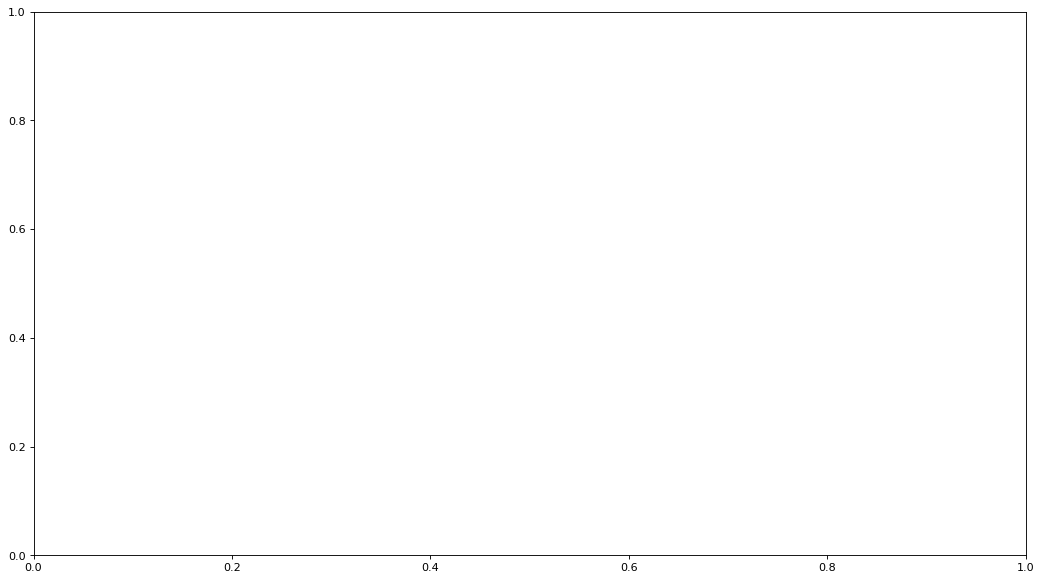

In [3]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=80)

The first call to plt.plot will automatically create the necessary anonymous figure and axes to achieve the desired plot. Subsequent calls to plt.plot re-use the current axes and each add another graph.

This is the same as you wrote ax.plot instead plt.plot. In both cases you will get a list of plotted graph primitives.

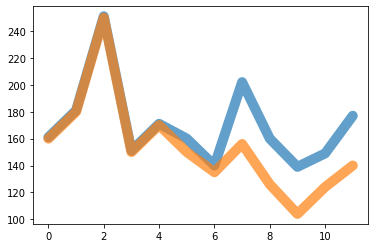

In [4]:
lines = plt.plot(df[['Received', 'Processed']],linewidth=10, solid_capstyle='round', alpha=0.7)
fig, ax = plt.gcf(), plt.gca()

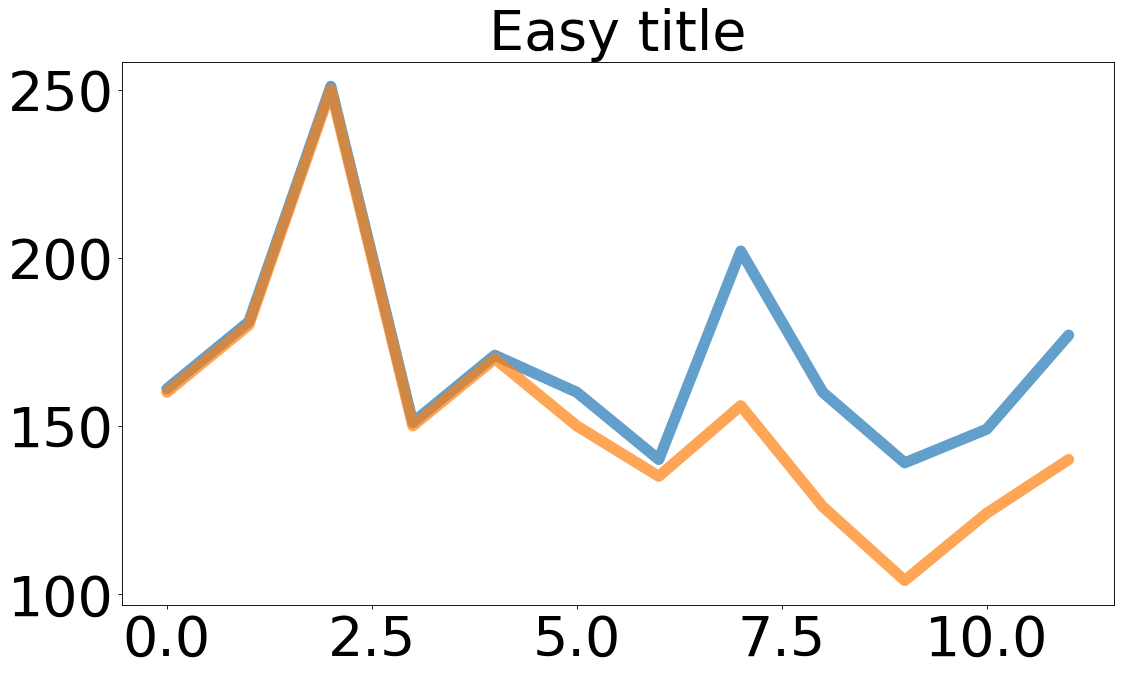

In [5]:
ax.tick_params(axis='both', which='major', labelsize=50)
ax.set_title('Easy title', size=50)
fig.set(size_inches=(16, 9), dpi=80)
fig

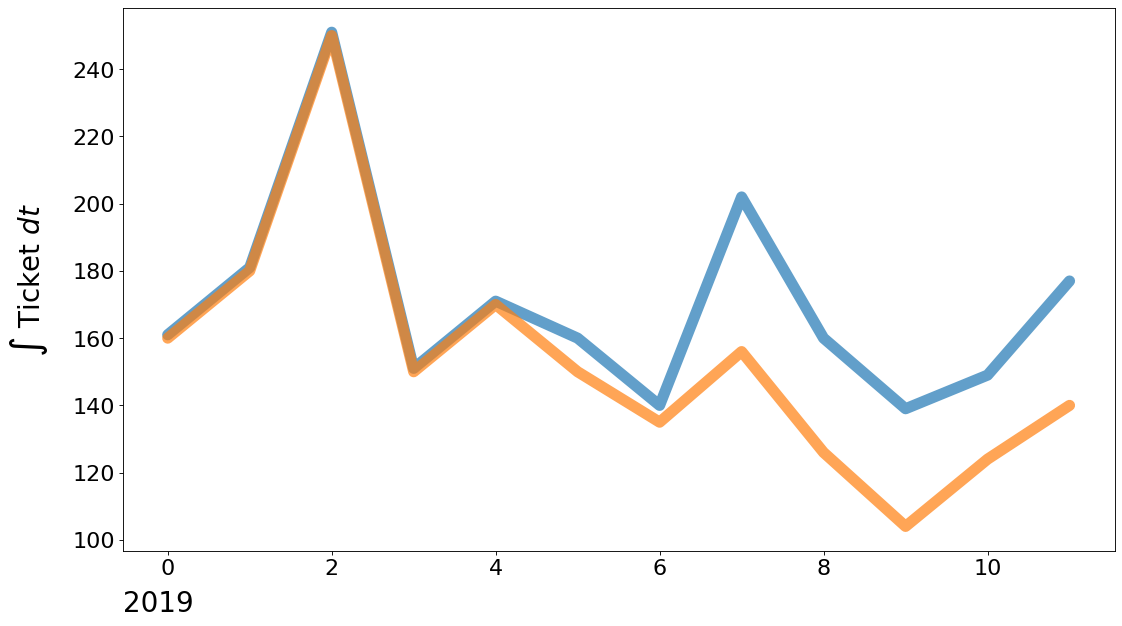

In [6]:
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('', size=20)
ax.set_xlabel('2019', size=25, labelpad=10, horizontalalignment='left', position=(0, 0))
ax.set_ylabel(r'$\int\ {\rm Ticket}\ dt$', size=25, labelpad=20)
fig

## Scale

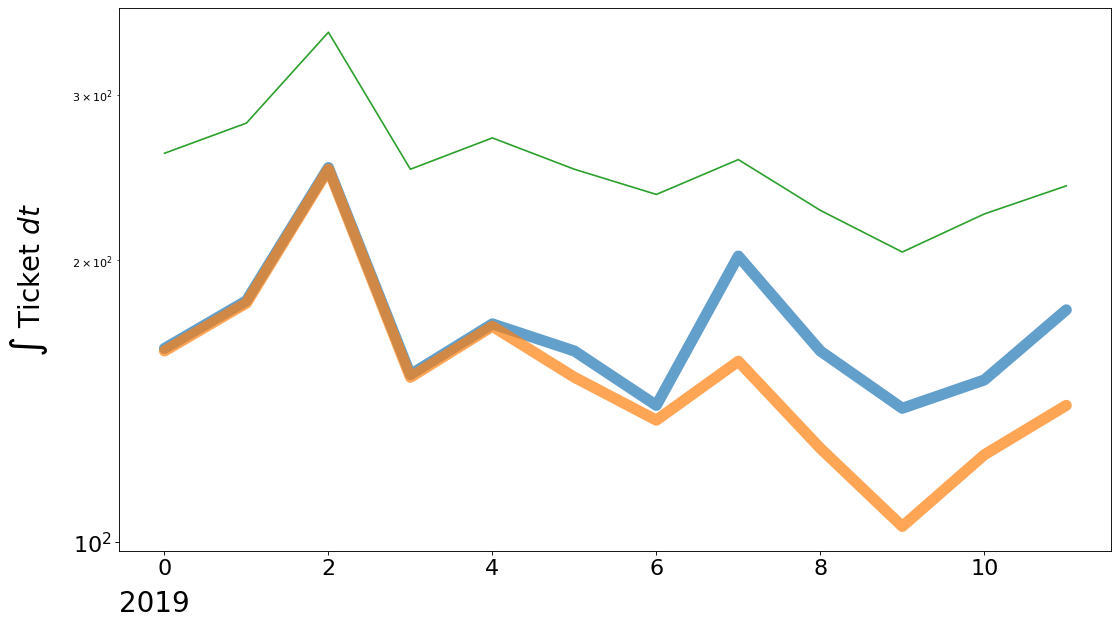

In [7]:
lines += ax.plot(df['Processed'] + 100)
ax.set_yscale('log')
fig

## Annotation & Color

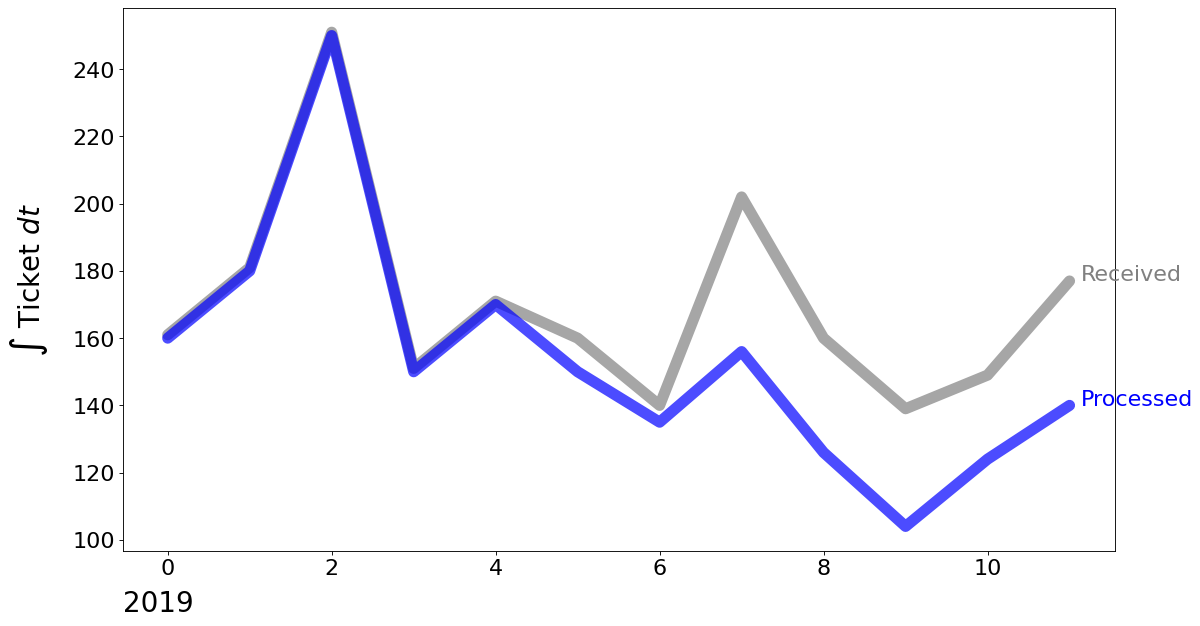

In [8]:
# recompute the ax.dataLim
ax.lines = lines[:2]
ax.set_yscale('linear')
ax.relim() # пересчитывает пределы
ax.set_autoscale_on(True) # сам масштабирует график
# update ax.viewLim using the new dataLim
ax.autoscale_view() # сам масштабирует график
for col in df.columns[:2]:
    ax.annotate(col, xy=(df.index[-1], df[col].iloc[-1]),
                xytext=(10,0), textcoords="offset points", size=20)
ax.lines[0].set_color('gray')
ax.lines[1].set_color('blue')
ax.texts[-2].set_color(ax.lines[0].get_color())
ax.texts[-1].set_color(ax.lines[1].get_color())    
fig

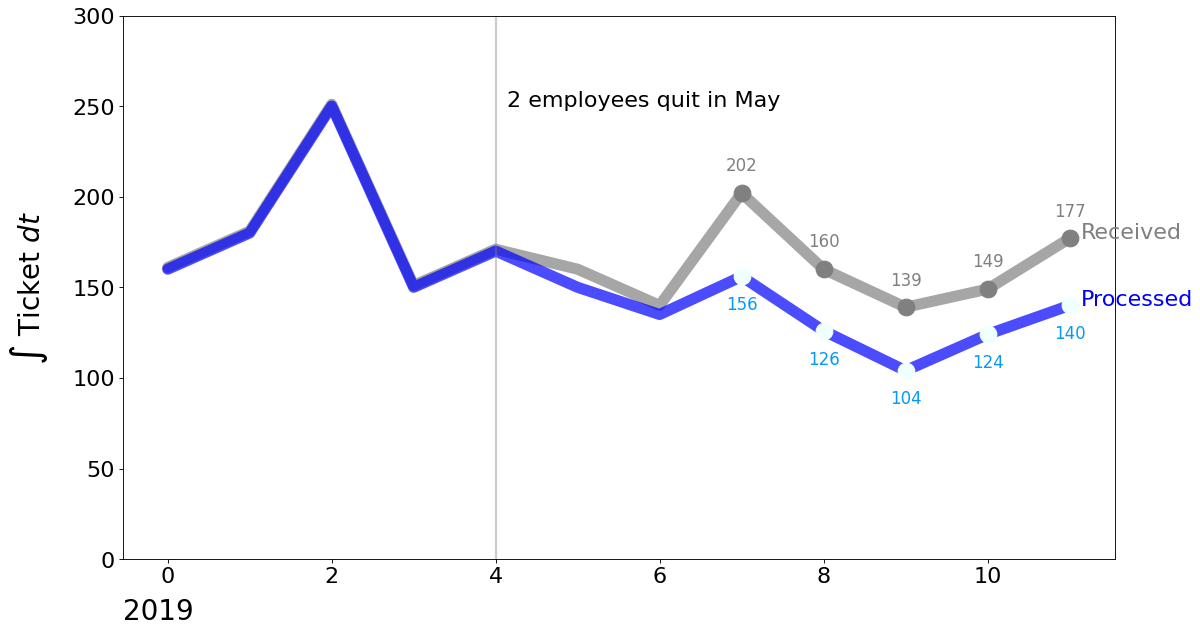

In [9]:
for i, row in df.iloc[7:].iterrows():
    ax.plot(i, row[0], 'o', color='gray', markersize=15)
    ax.plot(i, row[1], 'o', color='azure', markersize=15)
    ax.annotate(row[0], xy=(i, row[0]), xytext=(0,20), textcoords="offset points", horizontalalignment='center', color='gray', size=15)
    ax.annotate(row[1], xy=(i, row[1]), xytext=(0,-30), textcoords="offset points", horizontalalignment='center', color='xkcd:azure', size=15)
ax.set_ylim((0, 300))
ax.axvline(x=4, ymin=0., ymax=250., linewidth=2, color='gray', alpha=0.4, label='test')
ax.annotate('2 employees quit in May', xy=(4, 250), xytext=(10,0), textcoords="offset points", horizontalalignment='left', size=20)
fig

In [10]:
# for i, row in df.iloc[7:].iterrows():
df.iloc[7:]

,Received,Processed,2019
7,202,156,Aug
8,160,126,Sep
9,139,104,Oct
10,149,124,Nov
11,177,140,Dec


# Load example data

In [11]:
# https://www.kaggle.com/c/titanic/data?select=train.csv
df = pd.read_csv('train.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


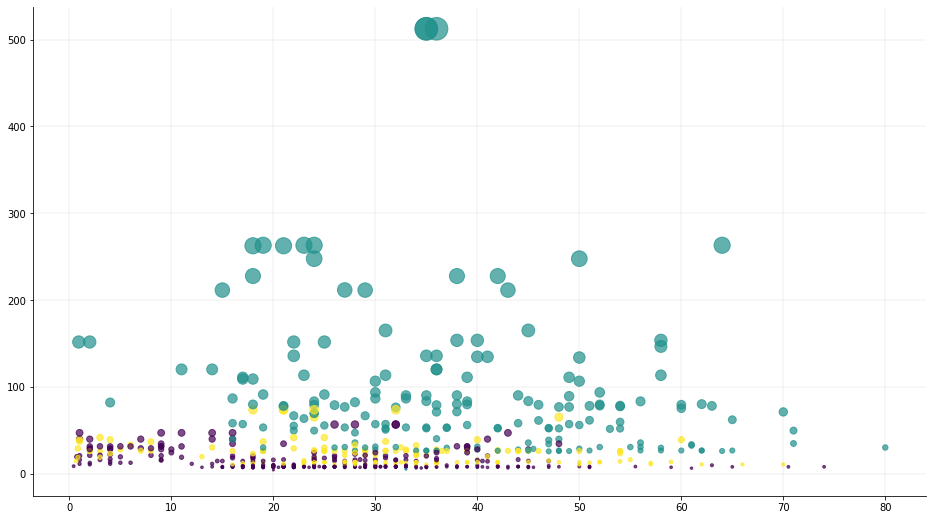

In [14]:
a = plt.scatter(x=df['Age'], y=df['Fare'], c=df['Pclass'].factorize()[0], s=df['Fare'], alpha=0.7, cmap='viridis')
a.axes.spines['top'].set_visible(False)
a.axes.spines['right'].set_visible(False)
a.axes.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
a.figure.set_size_inches(16, 9)

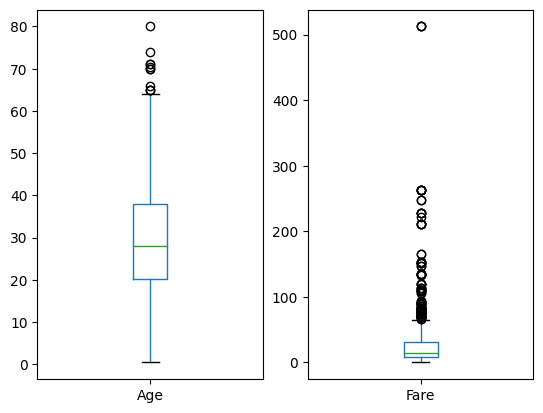

In [15]:
with plt.style.context('default'):
    ax = df[['Age', 'Fare']].plot(kind='box', subplots=True)

## What can you plot else with Maplotlib?

In [16]:
[p for p in filter(lambda prop: 'plot' in prop, dir(ax[0]))]

['_subplotspec',
 'boxplot',
 'eventplot',
 'get_subplotspec',
 'plot',
 'plot_date',
 'set_subplotspec',
 'stackplot',
 'streamplot',
 'triplot',
 'violinplot']

## Seaborn

In [17]:
titanic = sns.load_dataset("titanic")

<AxesSubplot:xlabel='age', ylabel='fare'>

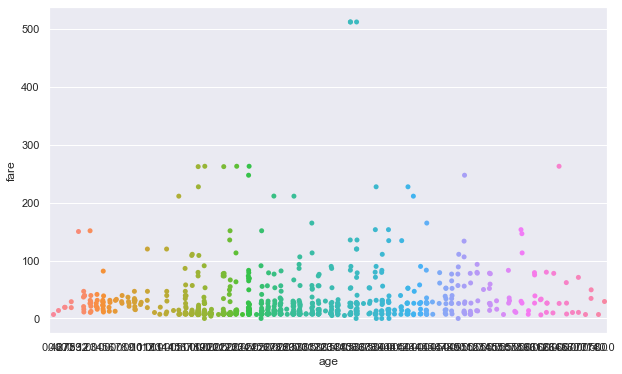

In [18]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.stripplot(x='age', y='fare', data=titanic)
# help(sns)

<AxesSubplot:xlabel='sex', ylabel='survived'>

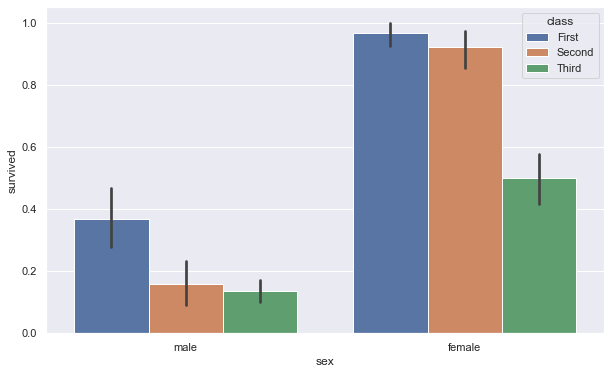

In [19]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

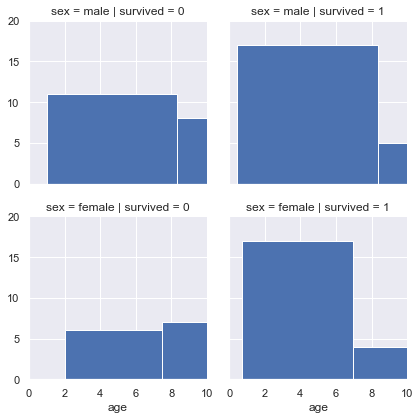

In [20]:
g = sns.FacetGrid(titanic, col="survived", row="sex")
g = g.map(plt.hist,"age")
plt.ylim(0,20)
plt.xlim(0,10)
plt.setp(ax,yticks=[0,5])
plt.tight_layout() 